In [1]:
import pandas as pd

In [3]:
dfTimeTables = pd.read_csv("data_sncf/timetables.csv", sep="\t")
dfCalendar = pd.read_csv('data_sncf/calendar.txt')
dfCalendarDates = pd.read_csv('data_sncf/calendar_dates.txt')
dfRoutes = pd.read_csv('data_sncf/routes.txt')
dfStopTimes = pd.read_csv('data_sncf/stop_times.txt')
dfStops = pd.read_csv('data_sncf/stops.txt')
dfTransfers = pd.read_csv('data_sncf/transfers.txt')
dfTrips = pd.read_csv('data_sncf/trips.txt')

FileNotFoundError: [Errno 2] No such file or directory: 'data_sncf/calendar.txt'

In [ ]:
df = pd.merge(dfTimeTables, dfTrips, on="trip_id")
df = pd.merge(df, dfCalendar, on="service_id")
df = pd.merge(df, dfCalendarDates, on="service_id")
df = pd.merge(df, dfRoutes, on="route_id")
df = pd.merge(df, dfStopTimes, on="trip_id")
df = pd.merge(df, dfStops, on="stop_id")

In [ ]:
df.head()

In [ ]:
dfTimeTables.head()

In [3]:
test = dfTimeTables["trajet"][0].split(" - ")

In [4]:
test


['Gare de Le Havre', 'Gare de Paris-St-Lazare']

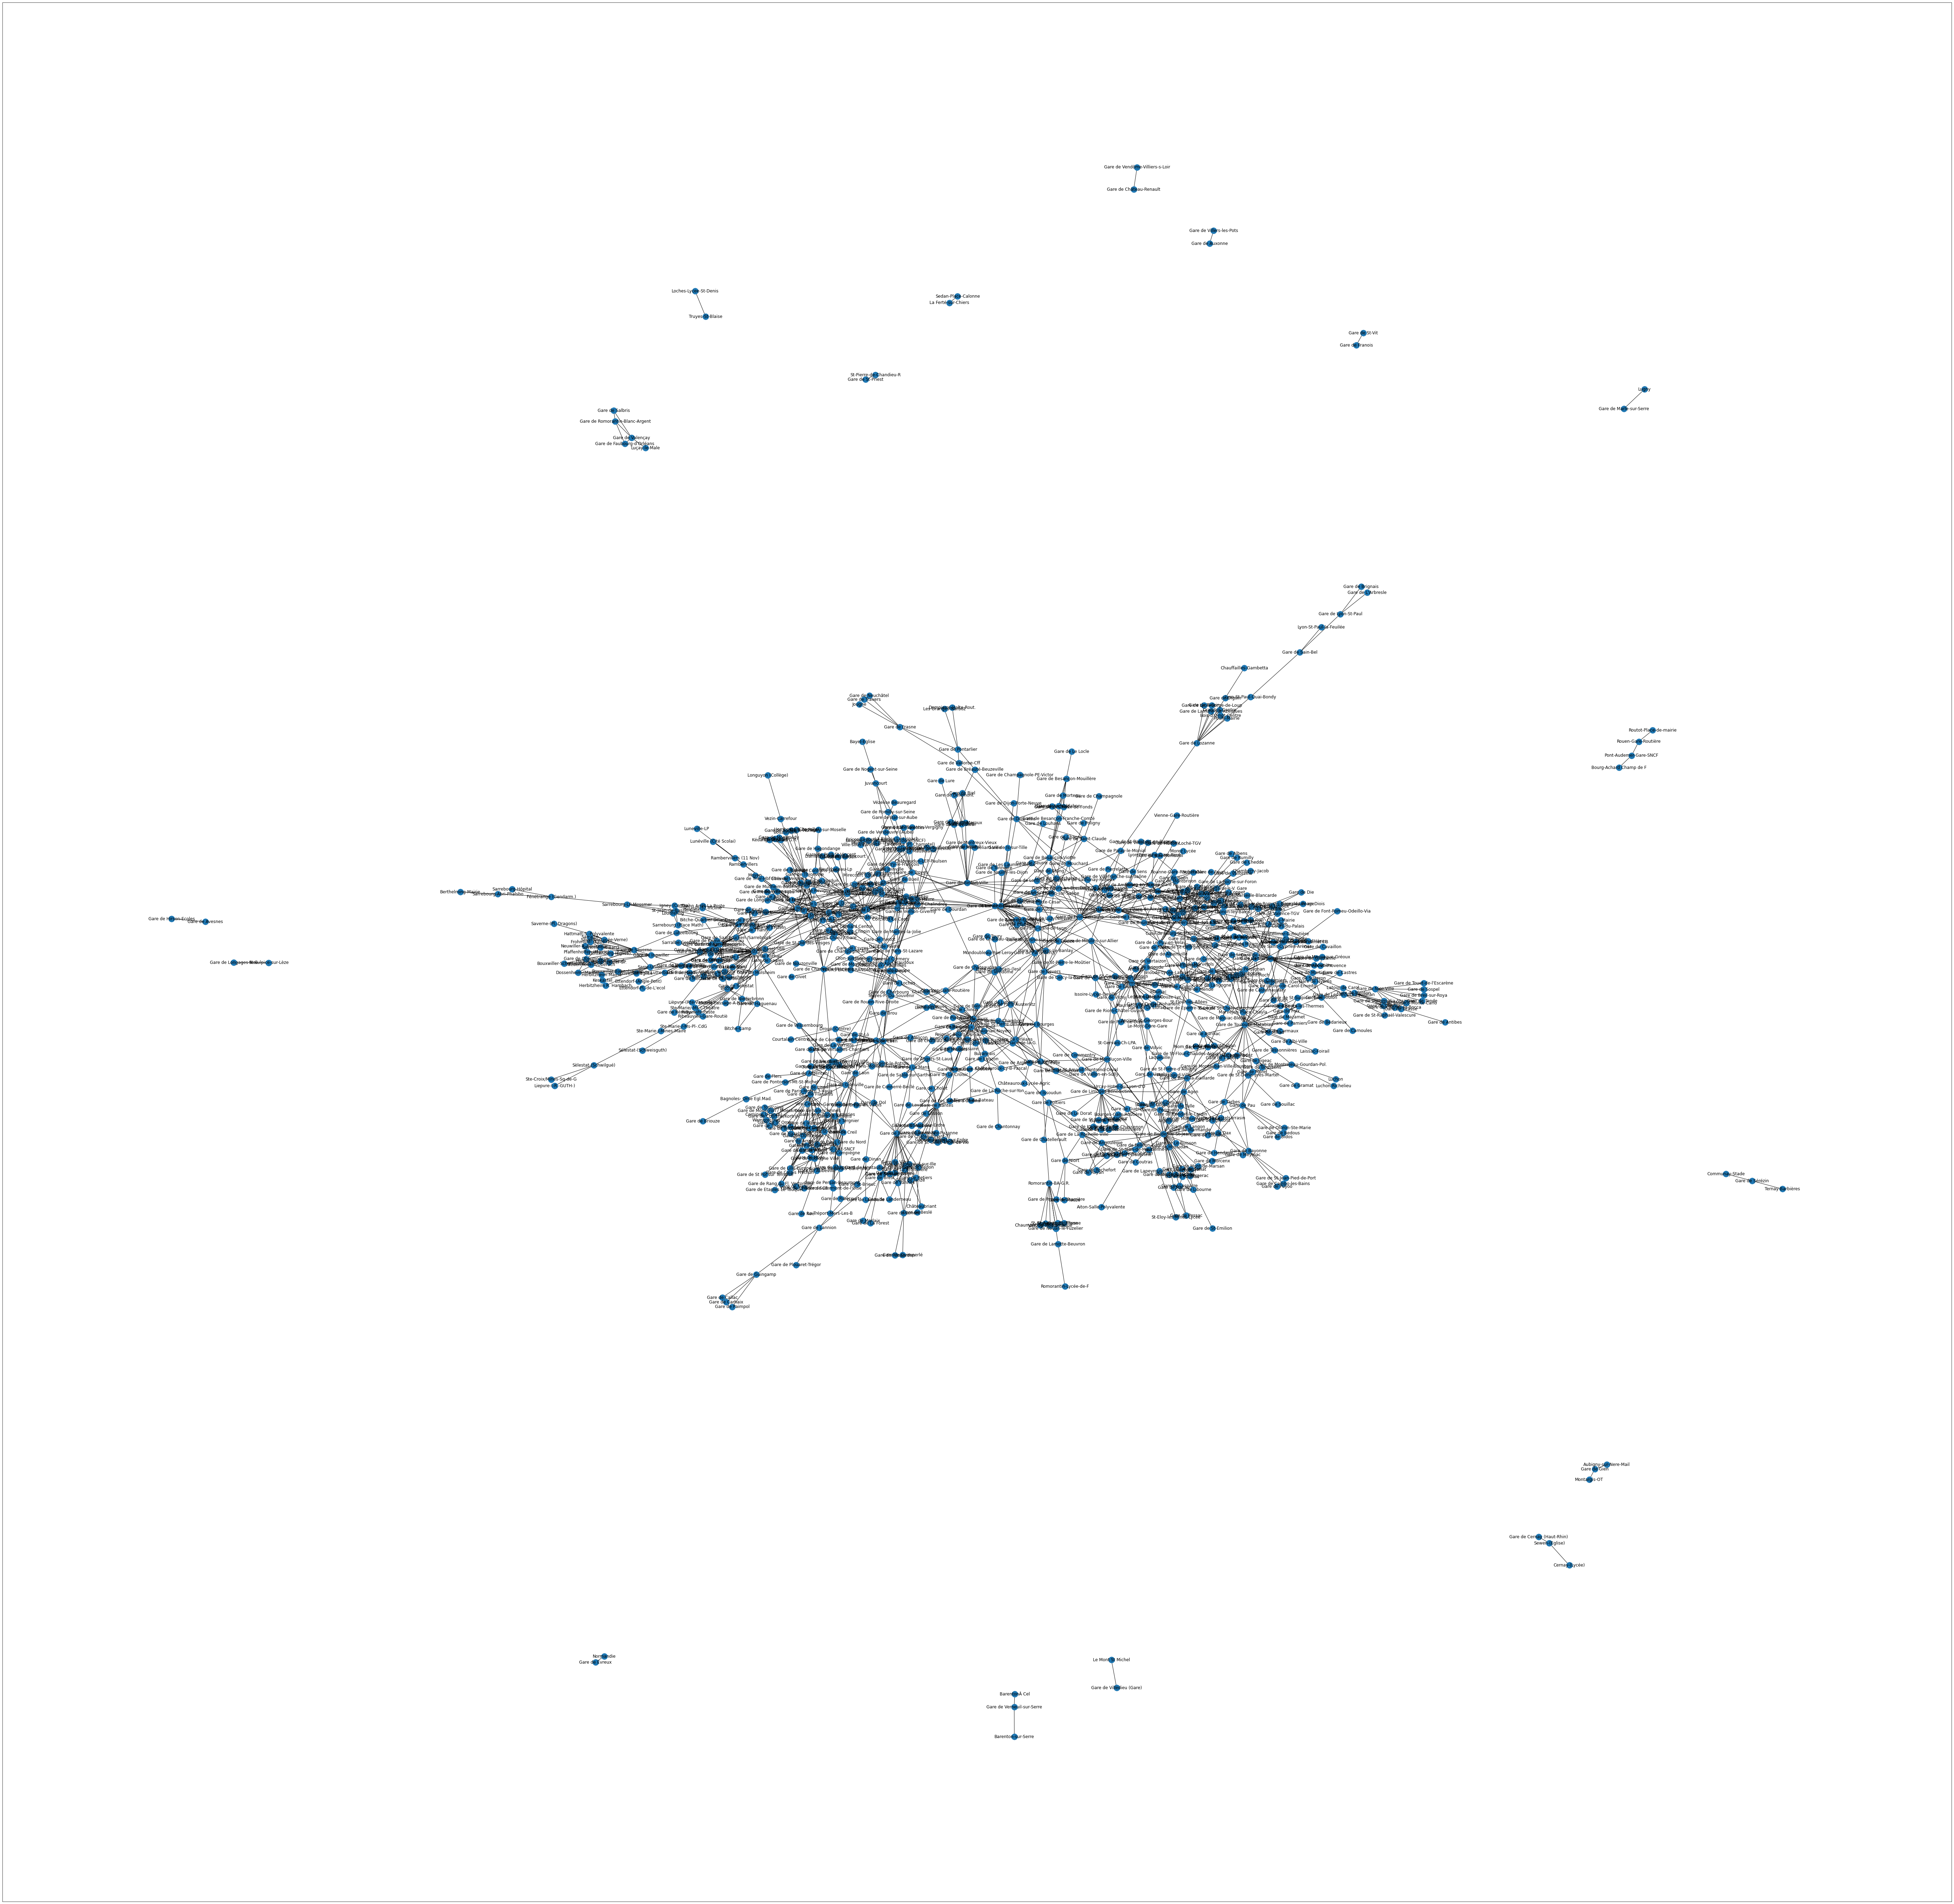

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

i = 0
G = {}
Graphe = nx.Graph()
while i < len(dfTimeTables):
    
#     print(dfTimeTables["trajet"][i].split(" - "), dfTimeTables["duree"][i])
    nodes_a = dfTimeTables["trajet"][i].split(" - ")
    j = 0
    name_node = f"{nodes_a[0]}"
    list_node = ()
    while j < len(dfTimeTables):
        
        nodes_b = dfTimeTables["trajet"][j].split(" - ")
        if nodes_a[0] == nodes_b[0]:
            time = dfTimeTables["duree"][j]
            new_node = ({nodes_b[1]:time},)
            list_node = sum((list_node, new_node), ())
            Graphe.add_edge(nodes_a[0], nodes_b[1], poids=time)
        if nodes_a[0] == nodes_b[1]:
            time = dfTimeTables["duree"][j]
            new_node = ({nodes_b[0]:time},)
            list_node = sum((list_node, new_node), ())
            Graphe.add_edge(nodes_a[0], nodes_b[0], poids=time)
        j += 1
    tmp_G = {name_node : list_node}
    G.update(tmp_G)
    i += 1
with open('data/graphe.txt', 'w') as convert_file:
     convert_file.write(str(G))
fig, ax = plt.subplots(figsize=(100,100))
nx.draw_networkx(Graphe,ax=ax)
plt.savefig("filename2.png")

In [15]:
print(nx.dijkstra_path(Graphe, source="Gare de Nantes", target="Gare de Amiens", weight='weight'))

['Gare de Nantes', 'Gare de Le Mans', 'Gare de Caen', 'Gare de Rouen-Rive-Droite', 'Gare de Amiens']
